In [1]:
## Import Library
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Data Import
train=pd.read_csv("Data/train.csv")
test=pd.read_csv("Data/test.csv")

In [3]:
train.head()

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,1241333999,1241334017,1240600507,1240602723,3,1
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,1242429000,1242432018,1240960224,1240975592,2,0
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,1243027560,1243027818,1242163613,1242164398,0,0
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,1243555740,1243556121,1240963795,1240966730,18,1
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,USD,1243769880,1243770317,1241177914,1241180541,1,0


In [4]:
test.head()

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at
0,kkst917493670,Bràthair.,"My first film, of many to come. Trying to purs...",7000.0,brathair,False,US,USD,1449619185,1449619185,1446002581,1446159585
1,kkst1664901914,THE SCREENWRITER,A young man that has earned his master's in sc...,35000.0,the-screenwriter,False,US,USD,1453435620,1453435620,1450297323,1450411620
2,kkst925125077,The Hornets Nest the Fairmont Heights Story,Film about a high school constructed for negro...,49500.0,the-hornets-nest-the-fairmont-heights-story,False,US,USD,1451780700,1451780700,1448581356,1448672128
3,kkst1427645275,BROTHERS Season 2 - Groundbreaking Transgender...,The acclaimed series about a group of transgen...,40000.0,brothers-season-2-groundbreaking-transgender-male,False,US,USD,1445021518,1445021530,1440966830,1442429518
4,kkst1714249266,Blackdom the movie,Blackdom's history offers a new narrative tha...,20000.0,blackdom-the-movie,False,US,USD,1462068840,1462068844,1455765276,1458334890


In [5]:
train.shape

(108129, 14)

In [6]:
test.shape

(63465, 12)

## Data Exploration

In [10]:
#Train Data Missing Value Checking
train.isnull().sum()

project_id               0
name                     1
desc                     8
goal                     0
keywords                 0
disable_communication    0
country                  0
currency                 0
deadline                 0
state_changed_at         0
created_at               0
launched_at              0
backers_count            0
final_status             0
dtype: int64

In [11]:
#Test Data Missing Value Checking
test.isnull().sum()

project_id               0
name                     0
desc                     4
goal                     0
keywords                 0
disable_communication    0
country                  0
currency                 0
deadline                 0
state_changed_at         0
created_at               0
launched_at              0
dtype: int64

In [18]:
train.head()

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,1241333999,1241334017,1240600507,1240602723,3,1
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,1242429000,1242432018,1240960224,1240975592,2,0
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,1243027560,1243027818,1242163613,1242164398,0,0
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,1243555740,1243556121,1240963795,1240966730,18,1
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,USD,1243769880,1243770317,1241177914,1241180541,1,0


In [45]:
##Columns
train.columns

Index(['project_id', 'name', 'desc', 'goal', 'keywords',
       'disable_communication', 'country', 'currency', 'deadline',
       'state_changed_at', 'created_at', 'launched_at', 'backers_count',
       'final_status'],
      dtype='object')

In [4]:
train=train[['project_id','goal','disable_communication','country','currency','deadline','state_changed_at','created_at','launched_at','backers_count','final_status']]

In [5]:
test=test[['project_id','goal','disable_communication','country','currency','deadline','state_changed_at','created_at','launched_at']]

In [49]:
train.head()

,project_id,goal,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,kkst1451568084,20.0,False,US,USD,1241333999,1241334017,1240600507,1240602723,3,1
1,kkst1474482071,300.0,False,US,USD,1242429000,1242432018,1240960224,1240975592,2,0
2,kkst183622197,30.0,False,US,USD,1243027560,1243027818,1242163613,1242164398,0,0
3,kkst597742710,500.0,False,US,USD,1243555740,1243556121,1240963795,1240966730,18,1
4,kkst1913131122,2000.0,False,US,USD,1243769880,1243770317,1241177914,1241180541,1,0


In [50]:
test.head()

,project_id,goal,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at
0,kkst917493670,7000.0,False,US,USD,1449619185,1449619185,1446002581,1446159585
1,kkst1664901914,35000.0,False,US,USD,1453435620,1453435620,1450297323,1450411620
2,kkst925125077,49500.0,False,US,USD,1451780700,1451780700,1448581356,1448672128
3,kkst1427645275,40000.0,False,US,USD,1445021518,1445021530,1440966830,1442429518
4,kkst1714249266,20000.0,False,US,USD,1462068840,1462068844,1455765276,1458334890


## Data Preprocessing

### Datetime Object

In [6]:
#Converting into Datetime Object
train.deadline=pd.to_datetime(train.deadline,unit='s')
test.deadline=pd.to_datetime(test.deadline,unit='s')

In [7]:
train.head()

,project_id,goal,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,kkst1451568084,20.0,False,US,USD,2009-05-03 06:59:59,1241334017,1240600507,1240602723,3,1
1,kkst1474482071,300.0,False,US,USD,2009-05-15 23:10:00,1242432018,1240960224,1240975592,2,0
2,kkst183622197,30.0,False,US,USD,2009-05-22 21:26:00,1243027818,1242163613,1242164398,0,0
3,kkst597742710,500.0,False,US,USD,2009-05-29 00:09:00,1243556121,1240963795,1240966730,18,1
4,kkst1913131122,2000.0,False,US,USD,2009-05-31 11:38:00,1243770317,1241177914,1241180541,1,0


In [8]:
train.state_changed_at=pd.to_datetime(train.state_changed_at,unit='s')
test.state_changed_at=pd.to_datetime(test.state_changed_at,unit='s')

In [9]:
train.created_at=pd.to_datetime(train.created_at,unit='s')
test.created_at=pd.to_datetime(test.created_at,unit='s')

In [10]:
train.head()

,project_id,goal,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,kkst1451568084,20.0,False,US,USD,2009-05-03 06:59:59,2009-05-03 07:00:17,2009-04-24 19:15:07,1240602723,3,1
1,kkst1474482071,300.0,False,US,USD,2009-05-15 23:10:00,2009-05-16 00:00:18,2009-04-28 23:10:24,1240975592,2,0
2,kkst183622197,30.0,False,US,USD,2009-05-22 21:26:00,2009-05-22 21:30:18,2009-05-12 21:26:53,1242164398,0,0
3,kkst597742710,500.0,False,US,USD,2009-05-29 00:09:00,2009-05-29 00:15:21,2009-04-29 00:09:55,1240966730,18,1
4,kkst1913131122,2000.0,False,US,USD,2009-05-31 11:38:00,2009-05-31 11:45:17,2009-05-01 11:38:34,1241180541,1,0


In [11]:
train.launched_at=pd.to_datetime(train.launched_at,unit='s')
test.launched_at=pd.to_datetime(test.launched_at,unit='s')

In [12]:
train.head(3)

,project_id,goal,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,kkst1451568084,20.0,False,US,USD,2009-05-03 06:59:59,2009-05-03 07:00:17,2009-04-24 19:15:07,2009-04-24 19:52:03,3,1
1,kkst1474482071,300.0,False,US,USD,2009-05-15 23:10:00,2009-05-16 00:00:18,2009-04-28 23:10:24,2009-04-29 03:26:32,2,0
2,kkst183622197,30.0,False,US,USD,2009-05-22 21:26:00,2009-05-22 21:30:18,2009-05-12 21:26:53,2009-05-12 21:39:58,0,0


### Created Date

In [74]:
train['launch_diff']=(train.launched_at.dt.year-train.created_at.dt.year)*365+(train.launched_at.dt.month-train.created_at.dt.month)*30+(train.launched_at.dt.day-train.created_at.dt.day)


In [75]:
test['launch_diff']=(test.launched_at.dt.year-test.created_at.dt.year)*365+(test.launched_at.dt.month-test.created_at.dt.month)*30+(test.launched_at.dt.day-test.created_at.dt.day)


In [33]:
train['success_diff']=(train.state_changed_at.dt.year-train.created_at.dt.year)*365+(train.state_changed_at.dt.month-train.created_at.dt.month)*30+(train.state_changed_at.dt.day-train.created_at.dt.day)


In [70]:
test['success_diff']=(test.state_changed_at.dt.year-test.created_at.dt.year)*365+(test.state_changed_at.dt.month-test.created_at.dt.month)*30+(test.state_changed_at.dt.day-test.created_at.dt.day)


In [35]:
train['deadline_diff']=(train.deadline.dt.year-train.created_at.dt.year)*365+(train.deadline.dt.month-train.created_at.dt.month)*30+(train.deadline.dt.day-train.created_at.dt.day)


In [66]:
test['deadline_diff']=(test.deadline.dt.year-test.created_at.dt.year)*365+(test.deadline.dt.month-test.created_at.dt.month)*30+(test.deadline.dt.day-test.created_at.dt.day)

### Launched Date

In [48]:
train['launch_success_diff']=(train.state_changed_at.dt.year-train.launched_at.dt.year)*365+(train.state_changed_at.dt.month-train.launched_at.dt.month)*30+(train.state_changed_at.dt.day-train.launched_at.dt.day)


In [59]:
test['launch_success_diff']=(test.state_changed_at.dt.year-test.launched_at.dt.year)*365+(test.state_changed_at.dt.month-test.launched_at.dt.month)*30+(test.state_changed_at.dt.day-test.launched_at.dt.day)


In [45]:
train['launch_deadline_diff']=(train.deadline.dt.year-train.launched_at.dt.year)*365+(train.deadline.dt.month-train.launched_at.dt.month)*30+(train.deadline.dt.day-train.launched_at.dt.day)


In [61]:
test['launch_deadline_diff']=(test.deadline.dt.year-test.launched_at.dt.year)*365+(test.deadline.dt.month-test.launched_at.dt.month)*30+(test.deadline.dt.day-test.launched_at.dt.day)


In [85]:
train.shape

(108129, 12)

In [84]:
test.shape

(63465, 10)

In [78]:
train.columns

Index(['project_id', 'goal', 'disable_communication', 'country', 'currency',
       'deadline', 'state_changed_at', 'created_at', 'launched_at',
       'backers_count', 'final_status', 'launch_diff', 'success_diff',
       'deadline_diff', 'launch_deadline_diff', 'launch_success_diff'],
      dtype='object')

In [81]:
train=train[['project_id', 'goal', 'disable_communication', 'country', 'currency',
       'launch_diff', 'success_diff','deadline_diff', 'launch_deadline_diff', 'launch_success_diff','backers_count', 'final_status',]]

In [83]:
test=test[['project_id', 'goal', 'disable_communication', 'country', 'currency',
       'launch_diff', 'success_diff','deadline_diff', 'launch_deadline_diff', 'launch_success_diff']]

In [86]:
train.head(3)

,project_id,goal,disable_communication,country,currency,launch_diff,success_diff,deadline_diff,launch_deadline_diff,launch_success_diff,backers_count,final_status
0,kkst1451568084,20.0,False,US,USD,0,9,9,9,9,3,1
1,kkst1474482071,300.0,False,US,USD,1,18,17,16,17,2,0
2,kkst183622197,30.0,False,US,USD,0,10,10,10,10,0,0


## Currency

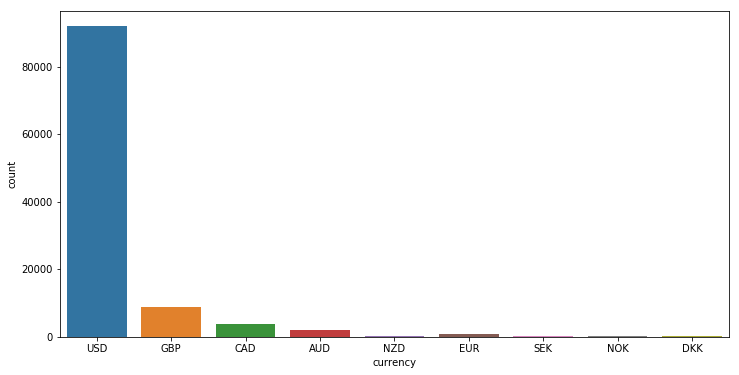

In [87]:
plt.figure(figsize=(12,6))
sns.countplot(train.currency)

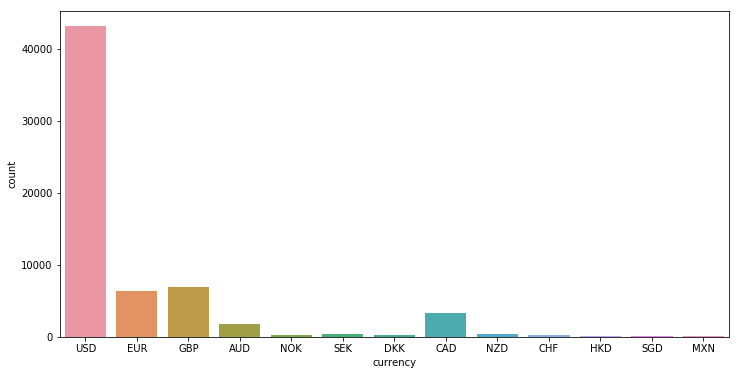

In [88]:
plt.figure(figsize=(12,6))
sns.countplot(test.currency)

In [89]:
test.currency.nunique()

13

In [90]:
train.currency.nunique()

9

In [91]:
(np.union1d(train.currency,test.currency))

array(['AUD', 'CAD', 'CHF', 'DKK', 'EUR', 'GBP', 'HKD', 'MXN', 'NOK',
       'NZD', 'SEK', 'SGD', 'USD'], dtype=object)

## Converting all currency into same scale(USD)

In [92]:
def currency_converter(currency):
    x=currency[0]
    y=currency[1]
    if x=='AUD' or x=='CAD':
        return(y*0.80)
    elif x=='CHF':
        return(y*1.04)
    elif x=='DKK':
        return(y*0.16)
    elif x=='EUR':
        return(y*1.22)
    elif x=='GBP':
        return(y*1.40)
    elif x=='HKD':
        return(y*0.13)
    elif x=='MXN':
        return(y*0.05)
    elif x=='NOK':
        return(y*0.13)
    elif x=='NZD':
        return(y*0.73)
    elif x=='SEK':
        return(y*0.12)
    elif x=='SGD':
        return(y*0.76)
    else:
        return(y)

In [97]:
train['goal']=train[['currency','goal']].apply(lambda x: currency_converter(x),axis=1)

In [100]:
test['goal']=test[['currency','goal']].apply(lambda x: currency_converter(x),axis=1)

In [98]:
train.columns

Index(['project_id', 'goal', 'disable_communication', 'country', 'currency',
       'launch_diff', 'success_diff', 'deadline_diff', 'launch_deadline_diff',
       'launch_success_diff', 'backers_count', 'final_status'],
      dtype='object')

In [101]:
test.columns

Index(['project_id', 'goal', 'disable_communication', 'country', 'currency',
       'launch_diff', 'success_diff', 'deadline_diff', 'launch_deadline_diff',
       'launch_success_diff'],
      dtype='object')

In [103]:
train.drop(['currency'],axis=1,inplace=True)

In [104]:
test.drop(['currency'],axis=1,inplace=True)

### Country

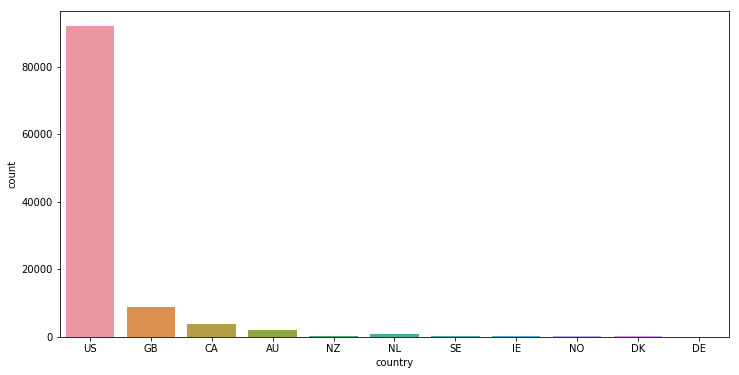

In [106]:
plt.figure(figsize=(12,6))
sns.countplot(train.country)

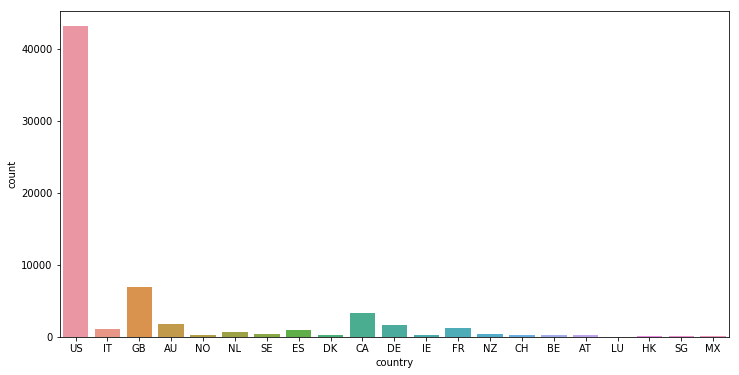

In [107]:
plt.figure(figsize=(12,6))
sns.countplot(test.country)

In [108]:
train.country.nunique()

11

In [109]:
test.country.nunique()

21

In [110]:
len(np.union1d(train.country,test.country))

21

### Without OneHot Encoding

In [126]:
def country(x):
    if x=='US':
        return(1)
    else:
        return(0)

In [128]:
train.country=train.country.apply(lambda x: country(x))
test.country=test.country.apply(lambda x: country(x))

In [129]:
train.head()

,project_id,goal,disable_communication,country,launch_diff,success_diff,deadline_diff,launch_deadline_diff,launch_success_diff,backers_count,final_status
0,kkst1451568084,20.0,False,1,0,9,9,9,9,3,1
1,kkst1474482071,300.0,False,1,1,18,17,16,17,2,0
2,kkst183622197,30.0,False,1,0,10,10,10,10,0,0
3,kkst597742710,500.0,False,1,0,30,30,30,30,18,1
4,kkst1913131122,2000.0,False,1,0,30,30,30,30,1,0


In [130]:
test.head()

,project_id,goal,disable_communication,country,launch_diff,success_diff,deadline_diff,launch_deadline_diff,launch_success_diff
0,kkst917493670,7000.0,False,1,1,40,40,39,39
1,kkst1664901914,35000.0,False,1,2,41,41,39,39
2,kkst925125077,49500.0,False,1,2,42,42,40,40
3,kkst1427645275,40000.0,False,1,16,46,46,30,30
4,kkst1714249266,20000.0,False,1,30,73,73,43,43


## Disable Communication

In [131]:
train.disable_communication.value_counts()

False    107806
True        323
Name: disable_communication, dtype: int64

In [132]:
test.disable_communication.value_counts()

False    63119
True       346
Name: disable_communication, dtype: int64

In [134]:
dc={True:0,False:1}
train.disable_communication=train.disable_communication.apply(lambda x: dc[x])
test.disable_communication=test.disable_communication.apply(lambda x: dc[x])

In [135]:
train.head()

,project_id,goal,disable_communication,country,launch_diff,success_diff,deadline_diff,launch_deadline_diff,launch_success_diff,backers_count,final_status
0,kkst1451568084,20.0,1,1,0,9,9,9,9,3,1
1,kkst1474482071,300.0,1,1,1,18,17,16,17,2,0
2,kkst183622197,30.0,1,1,0,10,10,10,10,0,0
3,kkst597742710,500.0,1,1,0,30,30,30,30,18,1
4,kkst1913131122,2000.0,1,1,0,30,30,30,30,1,0


In [142]:
train.to_csv("train_20_Jan.csv",index=False)
test.to_csv("test_20_Jan.csv",index=False)

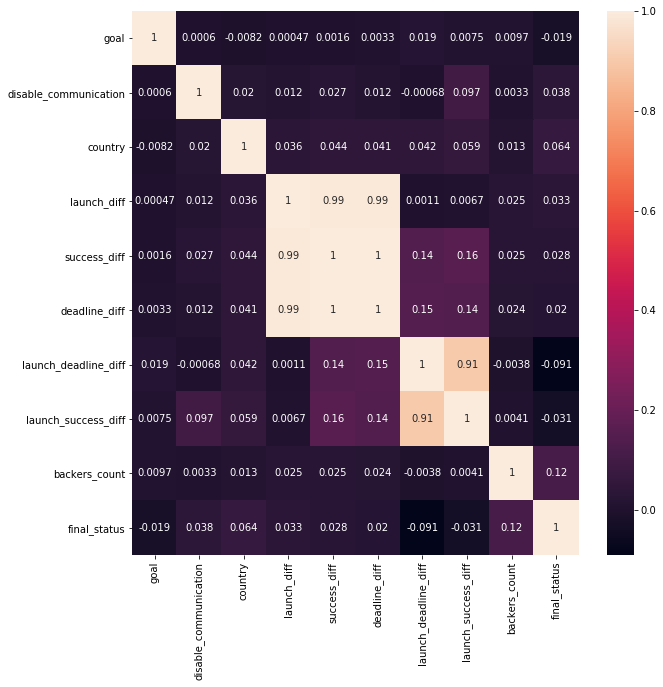

In [141]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True)

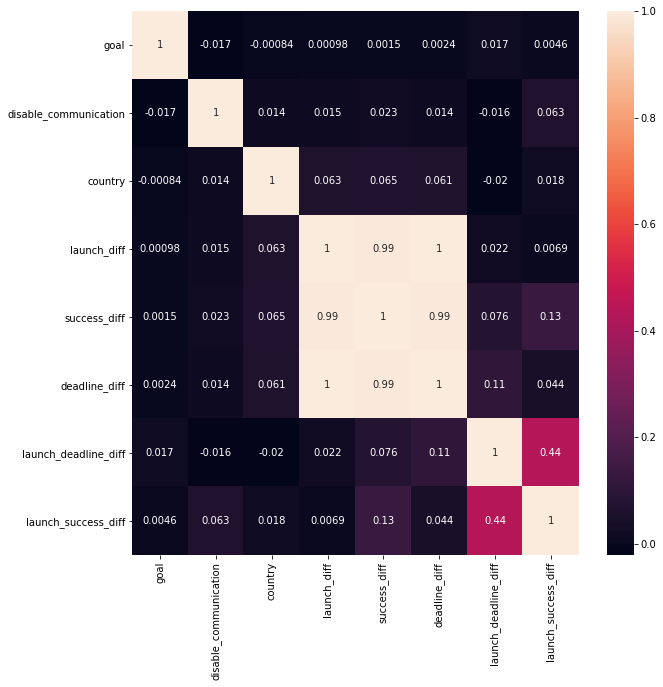

In [140]:
plt.figure(figsize=(10,10))
sns.heatmap(test.corr(),annot=True)

## Modelling Phase

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
train=pd.read_csv("Cleaned_Data/train_20_Jan.csv")
test=pd.read_csv("Cleaned_Data/test_20_Jan.csv")

In [3]:
train.head()

,project_id,goal,disable_communication,country,launch_diff,success_diff,deadline_diff,launch_deadline_diff,launch_success_diff,backers_count,final_status
0,kkst1451568084,20.0,1,1,0,9,9,9,9,3,1
1,kkst1474482071,300.0,1,1,1,18,17,16,17,2,0
2,kkst183622197,30.0,1,1,0,10,10,10,10,0,0
3,kkst597742710,500.0,1,1,0,30,30,30,30,18,1
4,kkst1913131122,2000.0,1,1,0,30,30,30,30,1,0


In [4]:
train.columns

Index(['project_id', 'goal', 'disable_communication', 'country', 'launch_diff',
       'success_diff', 'deadline_diff', 'launch_deadline_diff',
       'launch_success_diff', 'backers_count', 'final_status'],
      dtype='object')

In [5]:
X=train.drop(['project_id','backers_count','final_status'],axis=1)

In [6]:
y=train.final_status

In [7]:
from sklearn.model_selection import cross_val_score,train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [10]:
X_train.head(3)

,goal,disable_communication,country,launch_diff,success_diff,deadline_diff,launch_deadline_diff,launch_success_diff
57151,3000.0,1,1,7,27,27,20,20
28182,500.0,1,1,16,56,56,40,40
24725,2750.0,1,1,37,67,67,30,30


## Random_Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
model_RF=RandomForestClassifier(n_estimators=500,max_features='auto',min_samples_leaf=50,n_jobs=-1)

In [14]:
model_RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [15]:
### Scoring Function
def Score(model,X_train,y_train,X_test,y_test,train=True):
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import accuracy_score
    scoring = ['accuracy','precision', 'recall','f1']
    if train==True:
        print("Training Result \n")
        print("Accuracy Score:  {0:0.4f} \n".format(accuracy_score(y_train,model.predict(X_train))))
        scores=cross_val_score(estimator=model,X=X_train,y=y_train,cv=15,scoring='accuracy',n_jobs=-1)
        print("Cross-Validation Score: \n",scores.mean())
        print("Standard Deviation: \n",scores.std())
    elif train==False:
        print("TestResult \n")
        print("Accuracy Score:  {0:0.4f} \n".format(accuracy_score(y_test,model.predict(X_test))))

In [16]:
Score(model_RF,X_train,y_train,X_test,y_test,train=True)

Training Result 

Accuracy Score:  0.6995 

Cross-Validation Score: 
 0.686531059725
Standard Deviation: 
 0.00331172821032


In [17]:
Score(model_RF,X_train,y_train,X_test,y_test,train=False)

TestResult 

Accuracy Score:  0.6883 



In [50]:
test.head()

,project_id,goal,disable_communication,country,launch_diff,success_diff,deadline_diff,launch_deadline_diff,launch_success_diff
0,kkst917493670,7000.0,1,1,1,40,40,39,39
1,kkst1664901914,35000.0,1,1,2,41,41,39,39
2,kkst925125077,49500.0,1,1,2,42,42,40,40
3,kkst1427645275,40000.0,1,1,16,46,46,30,30
4,kkst1714249266,20000.0,1,1,30,73,73,43,43


In [52]:
test_data=test.iloc[:,1:]

In [54]:
pred_RF=model_RF.predict(test_data)

## Submission

In [55]:
sub=pd.read_csv("Data/samplesubmission.csv")

In [56]:
sub.head(3)

,project_id,final_status
0,kkst917493670,0
1,kkst1664901914,0
2,kkst925125077,1


In [57]:
sub.final_status=pred_RF

In [58]:
sub.to_csv("Random_Forest_bf.csv",index=False)

### Leaderboard Score 0.67515

### Optimzed Random Forest Model
model_RF=RandomForestClassifier(n_estimators=500,max_features='auto',min_samples_leaf=50,n_jobs=-1)

### XGBoost Model

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [63]:
train=pd.read_csv("Cleaned_Data/train_20_Jan.csv")
test=pd.read_csv("Cleaned_Data/test_20_Jan.csv")

In [64]:
train.head()

,project_id,goal,disable_communication,country,launch_diff,success_diff,deadline_diff,launch_deadline_diff,launch_success_diff,backers_count,final_status
0,kkst1451568084,20.0,1,1,0,9,9,9,9,3,1
1,kkst1474482071,300.0,1,1,1,18,17,16,17,2,0
2,kkst183622197,30.0,1,1,0,10,10,10,10,0,0
3,kkst597742710,500.0,1,1,0,30,30,30,30,18,1
4,kkst1913131122,2000.0,1,1,0,30,30,30,30,1,0


In [65]:
test.head()

,project_id,goal,disable_communication,country,launch_diff,success_diff,deadline_diff,launch_deadline_diff,launch_success_diff
0,kkst917493670,7000.0,1,1,1,40,40,39,39
1,kkst1664901914,35000.0,1,1,2,41,41,39,39
2,kkst925125077,49500.0,1,1,2,42,42,40,40
3,kkst1427645275,40000.0,1,1,16,46,46,30,30
4,kkst1714249266,20000.0,1,1,30,73,73,43,43


In [66]:
X=train.iloc[:,1:-2]
y=train.iloc[:,-1]

In [67]:
test_data=test.iloc[:,1:]

In [68]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [69]:
from xgboost import XGBClassifier

In [70]:
model_XGB=XGBClassifier(n_estimators=500)

In [71]:
model_XGB.fit(X_train,y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=500, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [72]:
from sklearn.metrics import accuracy_score

In [73]:
accuracy_score(y_test,model_XGB.predict(X_test))

0.69004901507444738

## XGBoost Optimization

In [74]:
from sklearn.grid_search import GridSearchCV

In [75]:
param_grid={
                "n_estimators":[300,400,500,600,700,1000],
                "max_depth":[2,3,4,5,6,9,10],
                "colsample_bytree":[0.5,0.6,0.7,0.9],
                "learning_rate":[0.01,0.1,0.3,0.03,0.5,0.9]
            }

In [76]:
grid_search=GridSearchCV(estimator=model_XGB, param_grid=param_grid,cv=10,n_jobs=-1)

In [ ]:
grid_search.fit(X_train,y_train)
model_XGB=grid_search.best_estimator_
model_XGB.fit(X_train,y_train)

In [35]:
pred_XGB=model_XGB.predict((test_data))

### Submission

In [36]:
sub=pd.read_csv("Data/samplesubmission.csv")

In [37]:
sub.head()

,project_id,final_status
0,kkst917493670,0
1,kkst1664901914,0
2,kkst925125077,1
3,kkst1427645275,0
4,kkst1714249266,0


In [38]:
sub.final_status=pred_XGB

In [39]:
sub.to_csv("Model_XGB.csv",index=False)

### Leaderboard Score : 0.67969

## New Approach

### First predicting Backerscount on Test Data and then checking for Final Status

In [77]:
train.head()

,project_id,goal,disable_communication,country,launch_diff,success_diff,deadline_diff,launch_deadline_diff,launch_success_diff,backers_count,final_status
0,kkst1451568084,20.0,1,1,0,9,9,9,9,3,1
1,kkst1474482071,300.0,1,1,1,18,17,16,17,2,0
2,kkst183622197,30.0,1,1,0,10,10,10,10,0,0
3,kkst597742710,500.0,1,1,0,30,30,30,30,18,1
4,kkst1913131122,2000.0,1,1,0,30,30,30,30,1,0


In [78]:
X=train.iloc[:,1:-2]
y=train.backers_count

In [79]:
test_data=test.iloc[:,1:]

In [80]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Random Forest

In [81]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
model_RF=RandomForestRegressor(n_estimators=150,max_features=0.2,min_samples_leaf=20)

In [87]:
model_RF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.2, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=20, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [84]:
from sklearn.metrics import mean_squared_error

In [88]:
np.sqrt(mean_squared_error(y_test,model_RF.predict(X_test)))

669.18504699860557

In [90]:
train.head()

,project_id,goal,disable_communication,country,launch_diff,success_diff,deadline_diff,launch_deadline_diff,launch_success_diff,backers_count,final_status
0,kkst1451568084,20.0,1,1,0,9,9,9,9,3,1
1,kkst1474482071,300.0,1,1,1,18,17,16,17,2,0
2,kkst183622197,30.0,1,1,0,10,10,10,10,0,0
3,kkst597742710,500.0,1,1,0,30,30,30,30,18,1
4,kkst1913131122,2000.0,1,1,0,30,30,30,30,1,0


In [89]:
pred=model_RF.predict(test_data)

In [91]:
test['backers_count']=pred

In [96]:
train['ratio']=train.backers_count/train.goal

In [97]:
test['ratio']=test.backers_count/test.goal

In [98]:
train.columns

Index(['project_id', 'goal', 'disable_communication', 'country', 'launch_diff',
       'success_diff', 'deadline_diff', 'launch_deadline_diff',
       'launch_success_diff', 'backers_count', 'final_status', 'ratio'],
      dtype='object')

In [99]:
cols=['project_id', 'goal', 'disable_communication', 'country', 'launch_diff',
       'success_diff', 'deadline_diff', 'launch_deadline_diff',
       'launch_success_diff', 'backers_count',  'ratio','final_status']

In [127]:
X=train[['goal','backers_count']]
y=train['final_status']
test_data=test[['goal','backers_count']]

In [133]:
model_RF=RandomForestClassifier(n_estimators=150,max_features=0.2,min_samples_leaf=20)

In [134]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [124]:
### Scoring Function
def Score(model,X_train,y_train,X_test,y_test,train=True):
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import accuracy_score
    scoring = ['accuracy','precision', 'recall','f1']
    if train==True:
        print("Training Result \n")
        print("Accuracy Score:  {0:0.4f} \n".format(accuracy_score(y_train,model.predict(X_train))))
        scores=cross_val_score(estimator=model,X=X_train,y=y_train,cv=15,scoring='accuracy',n_jobs=-1)
        print("Cross-Validation Score: \n",scores.mean())
        print("Standard Deviation: \n",scores.std())
    elif train==False:
        print("TestResult \n")
        print("Accuracy Score:  {0:0.4f} \n".format(accuracy_score(y_test,model.predict(X_test))))

In [135]:
model_RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [136]:
Score(model_RF,X_train,y_train,X_test,y_test,train=True)

Training Result 

Accuracy Score:  0.8824 

Cross-Validation Score: 
 0.874605721614
Standard Deviation: 
 0.00462167677086


In [137]:
Score(model_RF,X_train,y_train,X_test,y_test,train=False)

TestResult 

Accuracy Score:  0.8773 



In [139]:
pred_RF=model_RF.predict(test_data)

In [141]:
test_data

,goal,backers_count
0,7000.0,63.209089
1,35000.0,137.338650
2,49500.0,146.310119
3,40000.0,226.628779
4,20000.0,206.278943
5,10000.0,117.987670
6,1220.0,67.413157
7,420.0,40.049195
8,6000.0,36.557431
9,8000.0,197.462263


In [140]:
sub=pd.read_csv("Data/samplesubmission.csv")
sub.final_status=pred_RF
sub.to_csv("RF_Backers_Count.csv",index=False)

### Leaderboard Score 0.63620

## Submitted Model

### Random Forest(n_estimators=500,max_features='auto',min_samples_leaf=50,n_jobs=-1)